✅ Downloaded data; DF shape: (270, 5)


Ticker,AAPL,AMZN,GOOGL,MSFT,TSLA
Date,,,,,
2024-07-01,216.750000,197.199997,182.990005,456.730011,209.860001
2024-07-02,220.270004,200.000000,185.240005,459.279999,231.259995
2024-07-03,221.550003,197.589996,185.820007,460.769989,246.389999
2024-07-05,226.339996,200.000000,190.600006,467.559998,251.520004
2024-07-08,227.820007,199.289993,189.029999,466.239990,252.940002


✅ Saved close_prices.csv to data/


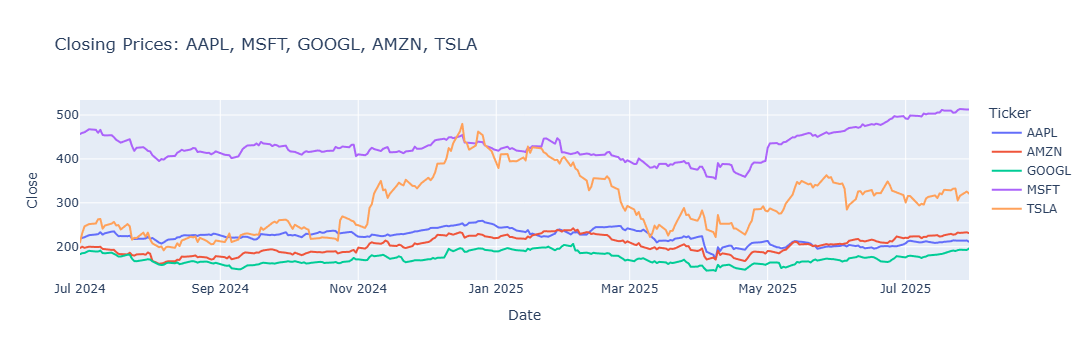

✅ Returns shape: (269, 5)
Correlation matrix:
 Ticker      AAPL      AMZN     GOOGL      MSFT      TSLA
Ticker                                                  
AAPL    1.000000  0.592498  0.513477  0.583037  0.494097
AMZN    0.592498  1.000000  0.655264  0.714081  0.538157
GOOGL   0.513477  0.655264  1.000000  0.582648  0.532375
MSFT    0.583037  0.714081  0.582648  1.000000  0.484058
TSLA    0.494097  0.538157  0.532375  0.484058  1.000000


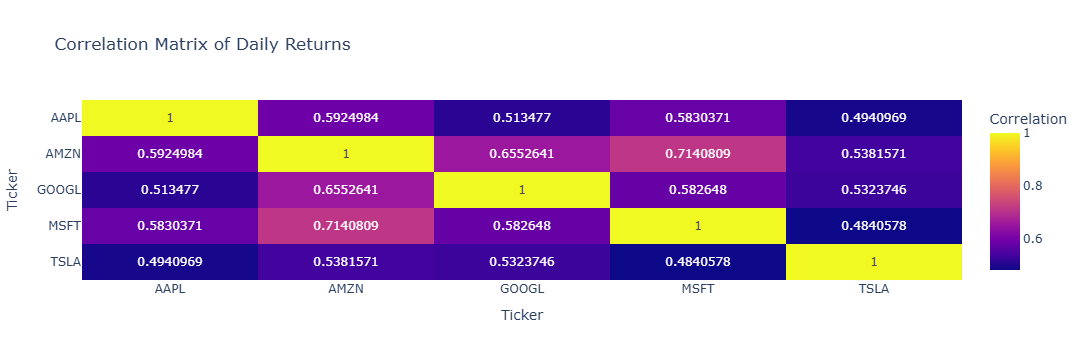

✅ heatmap.png saved in images/


In [16]:
# ─── Day 1: Fetch & Visualize Portfolio Data ───

# 1) Imports
import os
import pandas as pd
import yfinance as yf
import plotly.express as px

# 2) Download 1 year of daily closing prices for your 5 tickers
tickers = ["AAPL", "MSFT", "GOOGL", "AMZN", "TSLA"]
df = yf.download(
    tickers,
    start="2024-07-01",
    end="2025-07-30",
    auto_adjust=False,
    progress=False
)["Close"]
print("✅ Downloaded data; DF shape:", df.shape)
display(df.head())

# 3) Save raw prices to CSV
os.makedirs("data", exist_ok=True)
df.to_csv("data/close_prices.csv", index=True)
print("✅ Saved close_prices.csv to data/")

# 4) Plot closing-price time series
df_long = df.reset_index().melt(
    id_vars="Date",
    var_name="Ticker",
    value_name="Close"
)
fig = px.line(
    df_long,
    x="Date",
    y="Close",
    color="Ticker",
    title="Closing Prices: AAPL, MSFT, GOOGL, AMZN, TSLA"
)
fig.show()

# 5) Clean & compute correlation matrix
#    (back-fill & forward-fill to cover missing early data)
df_clean = df.bfill().ffill().dropna()
returns = df_clean.pct_change(fill_method=None).dropna()
corr = returns.corr()
print("✅ Returns shape:", returns.shape)
print("Correlation matrix:\n", corr)

# 6) Plot & save heat-map of correlations
os.makedirs("images", exist_ok=True)
fig2 = px.imshow(
    corr,
    text_auto=True,
    aspect="auto",
    title="Correlation Matrix of Daily Returns",
    labels=dict(x="Ticker", y="Ticker", color="Correlation")
)
fig2.write_image("../images/heatmap.png", width=600, height=600)
fig2.show()
print("✅ heatmap.png saved in images/")
